<a href="https://colab.research.google.com/github/santosomar/AIML-for-trading/blob/main/Algorithmic_Trading_Data_Sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

*Need to import some important Python libraries and methods that you will need to process financial data and perform data analysis.*

*The requests module enables you to easily download files from the web. It has a get method that takes a string of a URL to download.*

*The JavaScript Object Notation (JSON) module enables you to convert a string of JSON data into a Python dictionary via the loads method.*

*Pandas is a Python library that is built from the ground-up to do financial data analysis. It has a dataframe object that makes it easy to analyze tabular data traditionally done using spreadsheets.*

*Matplotlib is a Python library used for visualizing data. Pandas provides a wrapper to the library so you can plot nice charts with a single line of code.*

---



In [ ]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import json
import requests

start = datetime(2020, 1, 1)
end = datetime(2023, 5, 1)

# Federal Reserve Economic Data (FRED)

*FRED is the most comprehensive, free respository for US economic time series data. It has more than half a million economic times series from 87 sources, including government agencies such as the U.S. Census and the Bureau of Labor Statistics. It covers banking, business/fiscal, consumer price indexes, employment and population, exchange rates, gross domestic product, interest rates, monetary aggregates, producer price indexes, reserves and monetary base, U.S. trade and international transactions, and U.S. financial data.*

*See all the time series here: https://fred.stlouisfed.org/*

---



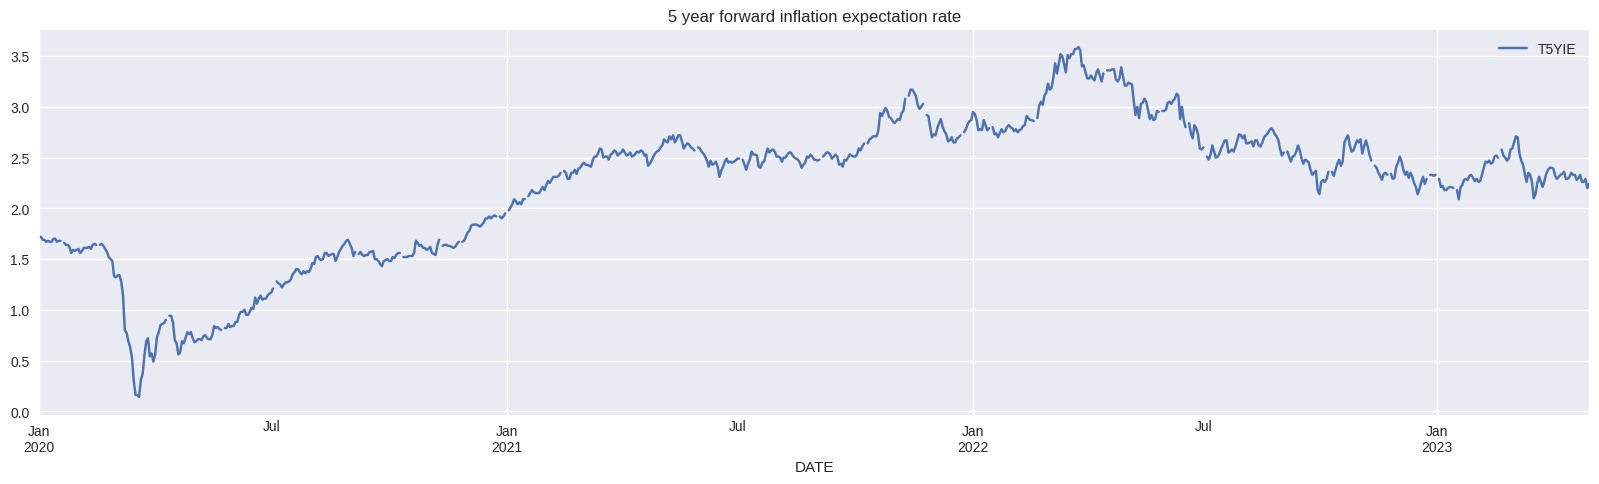

In [ ]:
inflation = pdr.DataReader('T5YIE', 'fred', start, end)
inflation.plot(figsize=(20,5), title='5 year forward inflation expectation rate'), plt.show();

# Alpha Vantage
*Repository of free and premium APIs for upto the minute streaming data and 20 years of historical data . APIs are grouped into four categories: 1. Equity 2. Currencies (including cryptocurrencies) 3. Sectors and 4. Technical indicators. Run by a tight-knit community of researchers, engineers, and business professionals. JSON is the default data format with CSV format also supported.*

*Data from this source requires extensive processing before it can used in financial data analysis. The 'Processing Data' workbook focuses on this data source and the steps required to clean the the data. Below are the final lines of code that you could use to get clean data for your analysis.*

*You can find the API documentation here: https://www.alphavantage.co/documentation/* 

---



In [ ]:
response = requests.get("https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey=demo")
alphadict = json.loads(response.text)
eur = pd.DataFrame(alphadict['Time Series FX (Daily)']).T
eur.index = pd.to_datetime(eur.index)
eur = eur.sort_index(ascending = True)
eur.columns = ['open', 'high', 'low', 'close']
eur = eur.astype(float)
eur.head()

,open,high,low,close
2022-12-14,1.06317,1.06952,1.06170,1.06815
2022-12-15,1.06812,1.07363,1.05910,1.06269
2022-12-16,1.06250,1.06631,1.05827,1.05839
2022-12-19,1.05880,1.06579,1.05740,1.06060
2022-12-20,1.06062,1.06586,1.05770,1.06232


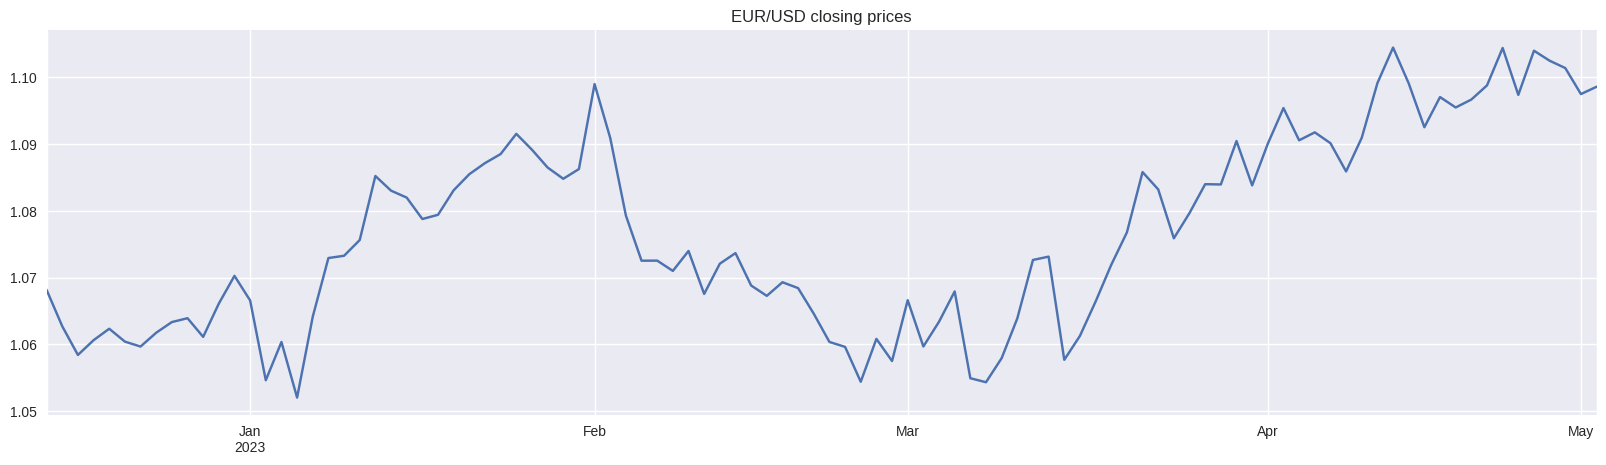

In [ ]:
eur['close'].plot(figsize=(20,5), title='EUR/USD closing prices'), plt.show();

# Yahoo Finance
*This is probably the oldest data source of free financial information. It has a vast repository of historical data that cover most traded securities worldwide.

*https://finance.yahoo.com*

---



In [ ]:
!pip install yfinance -q

In [ ]:
import yfinance as yf
msft = yf.Ticker('msft')
msft.history(start=start, end=end).tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-24 00:00:00-04:00,282.089996,284.950012,278.720001,281.769989,26611000,0.0,0.0
2023-04-25 00:00:00-04:00,279.510010,281.600006,275.369995,275.420013,45772200,0.0,0.0
2023-04-26 00:00:00-04:00,296.700012,299.570007,292.730011,295.369995,64599200,0.0,0.0
2023-04-27 00:00:00-04:00,295.970001,305.200012,295.250000,304.829987,46462600,0.0,0.0
2023-04-28 00:00:00-04:00,304.010010,308.929993,303.309998,307.260010,36446700,0.0,0.0


In [ ]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'fax': '425 706 7329',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'sector': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access License

In [ ]:
msft.earnings_dates.dropna()

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2023-04-25 12:00:00-04:00,2.23,2.45,0.0982
2023-01-24 11:00:00-05:00,2.29,2.32,0.0109
2022-10-25 12:00:00-04:00,2.30,2.35,0.0205
2022-07-26 12:00:00-04:00,2.29,2.23,-0.0274
2022-04-26 12:00:00-04:00,2.19,2.22,0.0160
2022-01-25 11:00:00-05:00,2.31,2.48,0.0725
2021-10-26 12:00:00-04:00,2.07,2.27,0.0941


# Quandl
*A one stop shop for economic, financial and sentiment data some of it is offered for free and most others for a fee. Quandl sources data from over half a million publishers worldwide. It was  acquired by NASDAQ in 2018. It sources freely available public sources like FRED and private sources of alternative data. Many freely available data, such as historical equity data, are offered for a fee.*

*See API documentation here: https://docs.quandl.com/*

---



*You will get an error when 50 api calls are made by the class. You need to get your own free API key*

In [ ]:
!pip install quandl -q

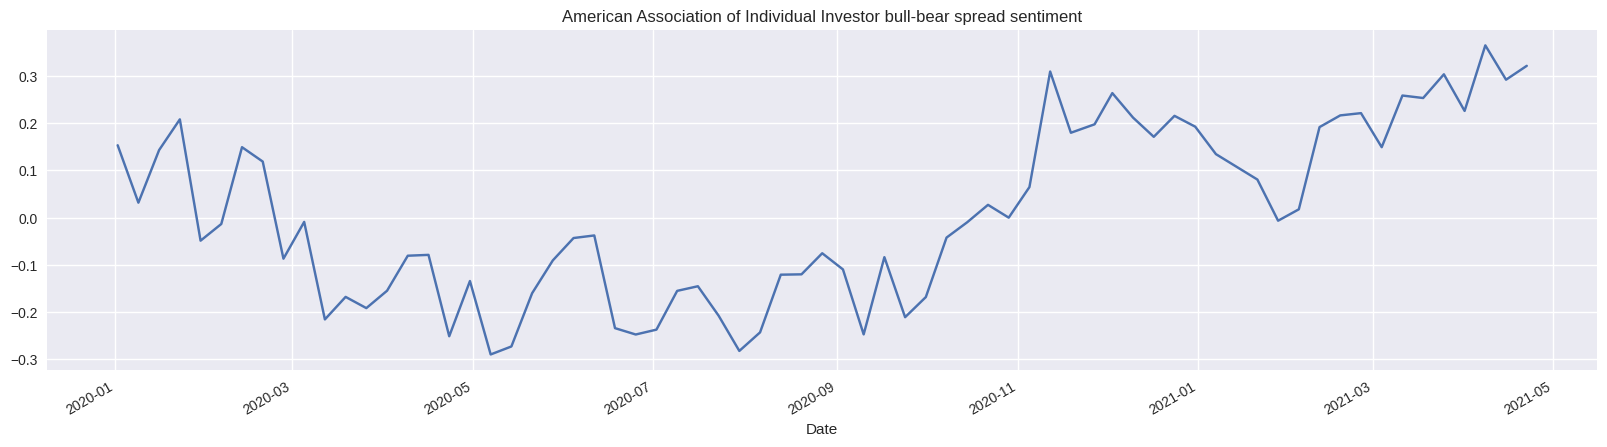

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
2021-03-25,0.509494,0.284810,0.205696,1.0,0.450599,0.303798,0.380245,0.480891,0.279599,3887.14,3864.63,3881.20
2021-04-01,0.458333,0.309524,0.232143,1.0,0.451054,0.226190,0.380245,0.480891,0.279599,4013.04,4013.04,4013.04
2021-04-08,0.569079,0.226974,0.203947,1.0,0.457611,0.365132,0.380245,0.480891,0.279599,4093.87,4089.89,4091.04
2021-04-15,0.538206,0.215947,0.245847,1.0,0.460250,0.292359,0.380245,0.480891,0.279599,4151.69,4120.87,4124.66
2021-04-22,0.526814,0.268139,0.205047,1.0,0.462819,0.321767,0.380245,0.480891,0.279599,4170.46,4160.11,4162.43


In [ ]:
import quandl
investor_sentiment = quandl.get('AAII/AAII_SENTIMENT', start_date= start, end_date= end)
investor_sentiment['Bull-Bear Spread'].plot(figsize=(20,5), title='American Association of Individual Investor bull-bear spread sentiment'), plt.show();
investor_sentiment.tail()

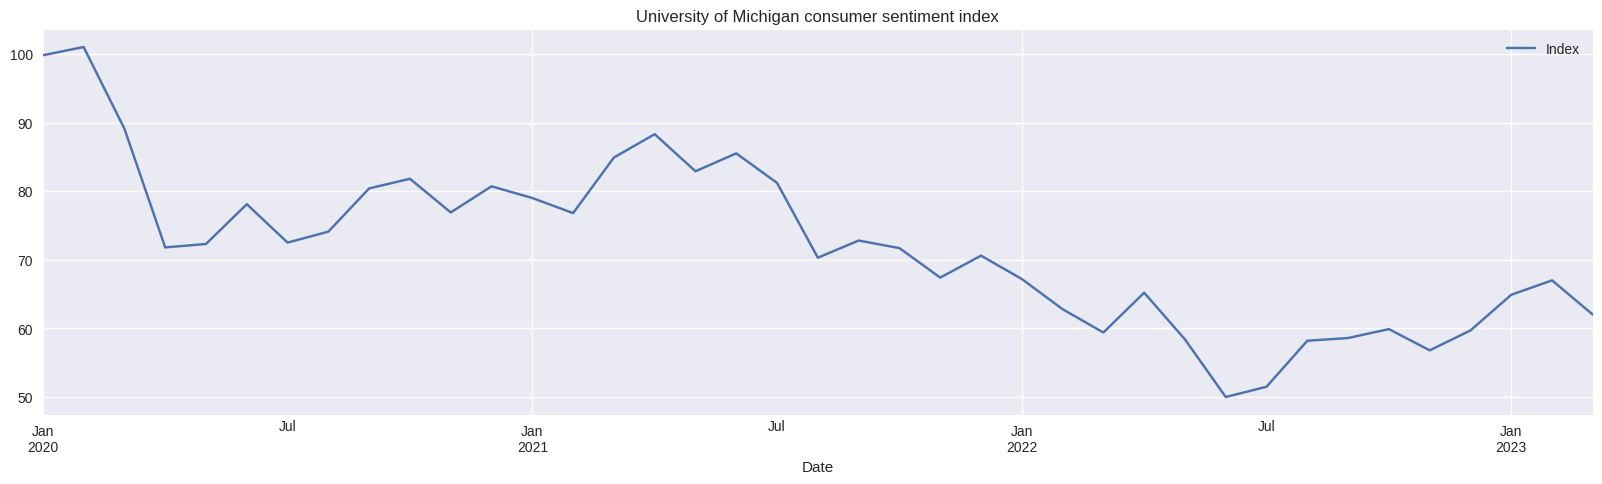

In [ ]:
consumer_sentiment = quandl.get('UMICH/SOC1', start_date= start, end_date= end)
consumer_sentiment.plot(figsize=(20,5), title='University of Michigan consumer sentiment index'), plt.show();

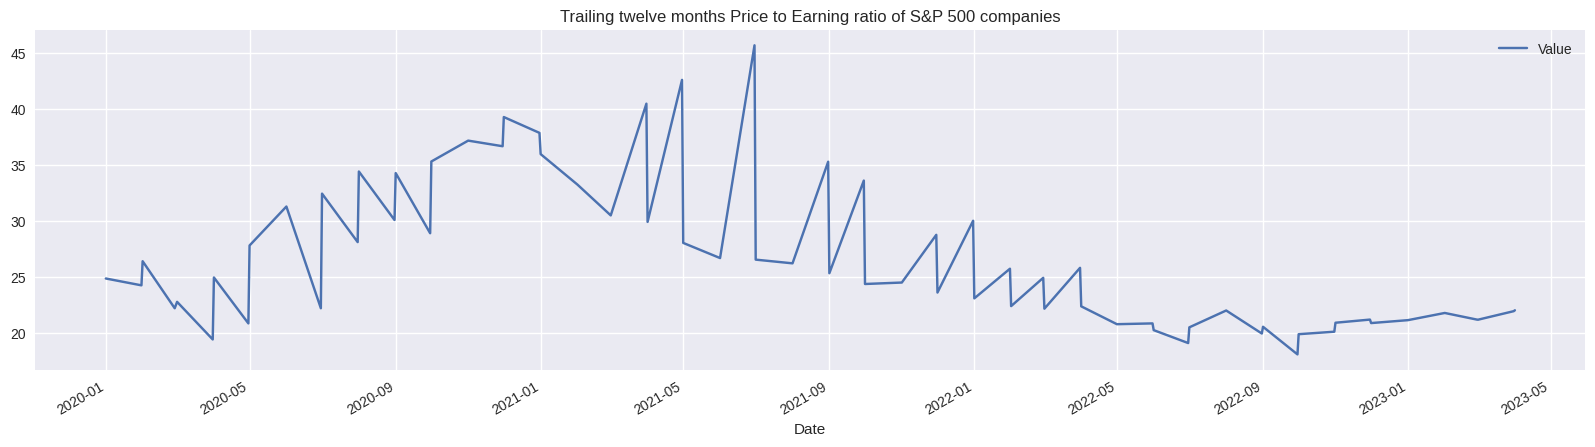

In [ ]:
spx = quandl.get('MULTPL/SP500_PE_RATIO_MONTH', start_date = start, end_date = end)
spx.plot(figsize=(20,5), title='Trailing twelve months Price to Earning ratio of S&P 500 companies'), plt.show();
